## Load the data and import libraries

In [1]:
#Loading the hedgeFund information into data and import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

data = pd.read_csv("retail_sales_dataset.csv")

data.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [4]:
print("Total Length of the data: ", len(data))

Total Length of the data:  1000


In [12]:
print("Columns of the data -  \n", data.columns)

Columns of the data -  
 Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'month', 'day_of_the_week'],
      dtype='object')


## Connecting to MySQL Server

In [3]:
db_engine = create_engine("xxxxxx")

In [4]:
data.to_sql('retail_sales', con=db_engine, if_exists='replace', index=False)

1000

## Data Preprocessing

In [5]:
# check for missing values

data.isna().sum()

# convert the date column into the date format

data['Date'] = pd.to_datetime(data['Date'])

## Feature Engineering

In [6]:
# creating new features (month, day_of_the_week)

data['month'] = data['Date'].dt.month
data['day_of_the_week'] = data['Date'].dt.day_name()

## Exploratory Data Analysis (EDA)

In [7]:
# Discriptive Statistics 

data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,month
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,6.549000
std,288.819436,13.68143,1.132734,189.681356,559.997632,3.452755
min,1.000000,18.00000,1.000000,25.000000,25.000000,1.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,4.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,6.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,10.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,12.000000


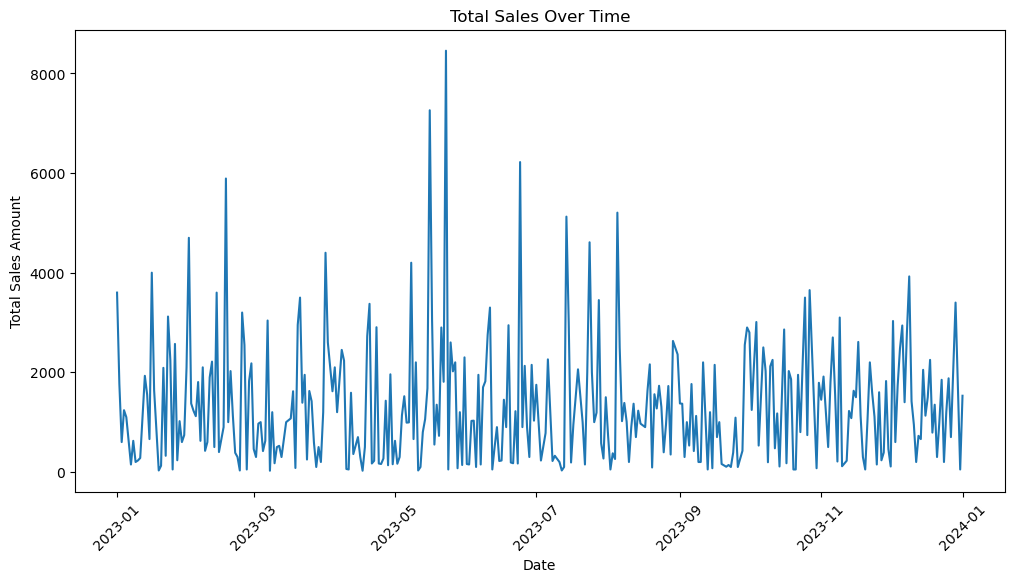

In [8]:
# Visualize the sales trends over time

import matplotlib.pyplot as plt
import seaborn as sns

data['Total Amount'] = data['Quantity'] * data['Price per Unit']  # Ensure total amount is calculated

plt.figure(figsize=(12, 6))
sales_over_time = data.groupby('Date')['Total Amount'].sum().reset_index()
sns.lineplot(data=sales_over_time, x='Date', y='Total Amount')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

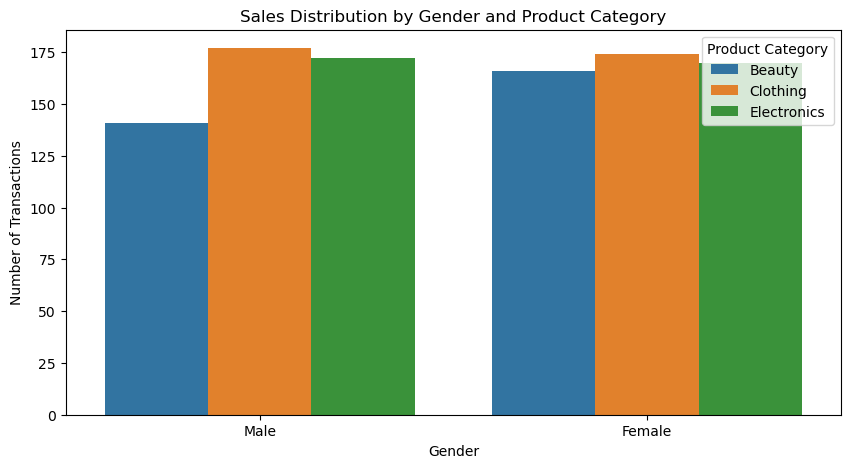

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Gender', hue='Product Category')
plt.title('Sales Distribution by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.legend(title='Product Category')
plt.show()

## Predictive Modelling

In [10]:
X = data[['Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit']]
y = data['Total Amount']  # Target variable

In [13]:
# converting categorical variable to numerical one using one-hot encoding

X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables

In [14]:
# split the data into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
# Evaluate the model performance

from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}, R-squared: {r2}')

Mean Absolute Error: 0.0, R-squared: 1.0


We are getting R-sqaured as 1 and Mean Absolute Error as 0 which is not a very good sign as it indicates overfitting. It is understandable because we are dealing with very less data it contains just 1000 rows therefore we are getting overfitting issues.

It can resolved by keeping as threshold as depth of the tree

In [19]:
# Train the model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [20]:
# Evaluate the model performance

from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}, R-squared: {r2}')

Mean Absolute Error: 79.61689529703862, R-squared: 0.9542767008986034


## Building Visualization Tools and Dashboards

In [21]:
import plotly.express as px

fig = px.bar(data, x='Product Category', y='Total Amount', color='Gender', title='Total Sales by Product Category and Gender')
fig.show()

In [18]:
# Monthly Performance

monthly_performance = data.groupby('month')['Total Amount'].sum().reset_index()

## Monitoring & Automation

In [16]:
def check_sales_performance(data):
    daily_sales = data.groupby('Date')['Total Amount'].sum()
    alert_threshold = daily_sales.mean() + 2 * daily_sales.std()
    alerts = daily_sales[daily_sales > alert_threshold]
    return alerts

alerts = check_sales_performance(data)